<a href="https://colab.research.google.com/github/Diyon335/PRA3500/blob/master/Week4/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


#Setup

We will create an x-y plane of 100 units in the positive x-y direction. 
The particle flies through this plane in the positive z-direction (only). Its x, y and z coords will be Monte Carlo data sets.




In [0]:
#Generates a Monte Carlo data set
def generateMonteCarlo(maxInt,coord_range):
  x = []
  for i in range(coord_range):
    x.append(random.randint(1,maxInt))
  return x
#Computes the dot product
def computeDotProduct(a , b):
  aMag = np.linalg.norm(a)
  bMag = np.linalg.norm(b)
  dotSum = 0
  for i in range(len(a)):
    dotSum += a[i]*b[i]

  return math.acos(dotSum/(aMag*bMag))

#Computes the chi squared value for a straight line with given error. it has a 1% chance of returning null
def computeChiSquared(x , y , error):
  
  gradients = []
  intercepts = []
  chi = 0
  
  for i in range(len(x)):
    gradients.append(y[i]/x[i])
    intercepts.append(y[i] - x[i]*gradients[i])
  
  gradient = np.average(gradients)
  intercept = np.average(intercepts)
  print("Fit Function: y = {}x + {}".format(gradient,intercept))

  for j in range(len(x)):
    chi += ((x[j] - gradient*y[j] - intercept)**2)/(error**2)
  
  if(random.random()<=0.01):
    chi = 0

  return chi

In [0]:
#The particle goes up to x, y and z = 100 in the +z direction. Coords are noted every 100 units
z = generateMonteCarlo(100 , 100)
x = generateMonteCarlo(100 , 100)
y = generateMonteCarlo(100 , 100)
x.sort()
y.sort()
z.sort()

In [8]:
zDetectionPoints = np.zeros(shape=(8))
xDetectionPoints = np.zeros(shape=(8))
yDetectionPoints = np.zeros(shape=(8))

#Divide the coords into 8 detection points
zStep = int((max(z) - min(z))/8)
yStep = int((max(y) - min(y))/8)
xStep = int((max(x) - min(x))/8)

for i in range(len(zDetectionPoints)):
  if (i==0):
    zDetectionPoints[i]=zStep
    yDetectionPoints[i]=yStep
    xDetectionPoints[i]=xStep

  zDetectionPoints[i] = zDetectionPoints[i-1] + zStep
  yDetectionPoints[i] = yDetectionPoints[i-1] + yStep
  xDetectionPoints[i] = xDetectionPoints[i-1] + xStep
  
  
print(zDetectionPoints)
print(yDetectionPoints)
print(xDetectionPoints)

[12. 24. 36. 48. 60. 72. 84. 96.]
[12. 24. 36. 48. 60. 72. 84. 96.]
[12. 24. 36. 48. 60. 72. 84. 96.]


In [9]:
#Our particle is moving in a straight line, with direction vector a = (12,12,12)
#Let's find the angle it's moving with respect to the z-plane b = (0,0,1)
a = [12,12,12]
b = [0 , 0 , 1]

angle = computeDotProduct(a,b)
print(angle)

0.9553166181245093


The particle seems to be moving in +xyz direction at an angle so it has a probability of being in a pixel of (y+1), (x+1) or (y+1) and (x+1). Let's only focus on the x-y plane and consider the probabilities for them, as this is the plane with pixels (the plane of the detection layers)

In [10]:
#Let the probability that the particle actually went through these other pixels = 0.10
p_x = 0.10
p_y = 0.10
p_diagonal = p_x*p_y

for i in range(len(zDetectionPoints)):
  if (random.random() <= p_x):
    xDetectionPoints[i]+=1
  if (random.random() <= p_y):
    yDetectionPoints[i]+=1
  if (random.random() <= p_diagonal):
    xDetectionPoints[i]+=1
    yDetectionPoints[i]+=1

print(zDetectionPoints)
print(yDetectionPoints)
print(xDetectionPoints)

[12. 24. 36. 48. 60. 72. 84. 96.]
[12. 24. 36. 48. 60. 72. 84. 97.]
[12. 24. 37. 48. 61. 72. 84. 96.]


#The Chi Squared Test

In the x-y plane, the particle's trajectory is approximately a straight line with a positive gradient. We will use this along with an arbitrary error value, sigma. This can be changed 

In [11]:
error = 1
computeChiSquared(xDetectionPoints, yDetectionPoints, error)

Fit Function: y = 0.9958745246270861x + 0.0


3.4950000360501132

Now let's simulate this test for many examples

In [0]:
tries = 100

try_array = np.arange(1,tries+1,1)

In [0]:
#This method just repeats everything that's been done so far to obtain the chi value in task 1
def plotChiSquared(try_array, adjacent_probability, line_error):

  steps = len(try_array)
  chi_values = []

  for i in range(steps):
    z = generateMonteCarlo(100 , 100)
    x = generateMonteCarlo(100 , 100)
    y = generateMonteCarlo(100 , 100)
    x.sort()
    y.sort()
    z.sort()

    zDetectionPoints = np.zeros(shape=(8))
    xDetectionPoints = np.zeros(shape=(8))
    yDetectionPoints = np.zeros(shape=(8))

    #Divide the coords into 8 detection points
    zStep = int((max(z) - min(z))/8)
    yStep = int((max(y) - min(y))/8)
    xStep = int((max(x) - min(x))/8)

    for i in range(len(zDetectionPoints)):
      if (i==0):
        zDetectionPoints[i]=zStep
        yDetectionPoints[i]=yStep
        xDetectionPoints[i]=xStep

      zDetectionPoints[i] = zDetectionPoints[i-1] + zStep
      yDetectionPoints[i] = yDetectionPoints[i-1] + yStep
      xDetectionPoints[i] = xDetectionPoints[i-1] + xStep

    p_x = adjacent_probability
    p_y = adjacent_probability
    p_diagonal = p_x*p_y

    for i in range(len(zDetectionPoints)):
      if (random.random() <= p_x):
        xDetectionPoints[i]+=1
      if (random.random() <= p_y):
        yDetectionPoints[i]+=1
      if (random.random() <= p_diagonal):
        xDetectionPoints[i]+=1
        yDetectionPoints[i]+=1

    chi_values.append(computeChiSquared(xDetectionPoints, yDetectionPoints, line_error))

  plt.plot(try_array,chi_values)
  plt.xlabel("Tries")
  plt.ylabel("Chi Squared Values")
  plt.title("Chi Squared for different examples")
  plt.show()

Fit Function: y = 0.9966216216216216x + 0.0
Fit Function: y = 1.0026041666666665x + 0.0
Fit Function: y = 1.000199435444281x + 0.0
Fit Function: y = 1.0055555555555555x + 0.0
Fit Function: y = 0.9966216216216216x + 0.0
Fit Function: y = 1.0x + 0.0
Fit Function: y = 1.00349600456621x + 0.0
Fit Function: y = 1.0052083333333335x + 0.0
Fit Function: y = 1.0x + 0.0
Fit Function: y = 1.002183562428408x + 0.0
Fit Function: y = 0.9977552000529941x + 0.0
Fit Function: y = 1.0014880952380953x + 0.0
Fit Function: y = 1.0x + 0.0
Fit Function: y = 1.0052083333333335x + 0.0
Fit Function: y = 1.0x + 0.0
Fit Function: y = 0.9903846153846154x + 0.0
Fit Function: y = 0.9932876712328766x + 0.0
Fit Function: y = 1.0925802139037433x + 4.440892098500626e-16
Fit Function: y = 1.001829954954955x + 0.0
Fit Function: y = 0.9166666666666666x + 0.0
Fit Function: y = 1.0x + 0.0
Fit Function: y = 1.0x + 0.0
Fit Function: y = 0.9168093607305936x + 0.0
Fit Function: y = 0.9987113402061856x + 0.0
Fit Function: y = 0.9

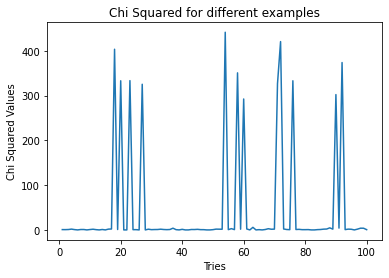

In [14]:
plotChiSquared(try_array, 0.10 , 1.5)

#Did our tracks come from the same place?

This task was combined with the last task to find the ChiSquared/N as well

In [0]:
particles = 3
tries = 1
try_array = np.ones(shape=(particles))

#Changed the function to now plot Chi Squareds for different particles
def plotChiSquareds(particles, try_array, adjacent_probability, line_error, tries, checkChiSquared=False):

  steps = tries
  chi_values = []
  colours = ['r','b','g','c','y']
  df = 8 - 1

  for p in range(particles):
    for i in range(steps):

      z = generateMonteCarlo(100 , 100)
      x = generateMonteCarlo(100 , 100)
      y = generateMonteCarlo(100 , 100)
      x.sort()
      y.sort()
      z.sort()

      zDetectionPoints = np.zeros(shape=(8))
      xDetectionPoints = np.zeros(shape=(8))
      yDetectionPoints = np.zeros(shape=(8))

      #Divide the coords into 8 detection points
      zStep = int((max(z) - min(z))/8)
      yStep = int((max(y) - min(y))/8)
      xStep = int((max(x) - min(x))/8)

      for i in range(len(zDetectionPoints)):
        if (i==0):
          zDetectionPoints[i]=zStep
          yDetectionPoints[i]=yStep
          xDetectionPoints[i]=xStep

        zDetectionPoints[i] = zDetectionPoints[i-1] + zStep
        yDetectionPoints[i] = yDetectionPoints[i-1] + yStep
        xDetectionPoints[i] = xDetectionPoints[i-1] + xStep

      p_x = adjacent_probability
      p_y = adjacent_probability
      p_diagonal = p_x*p_y

      for i in range(len(zDetectionPoints)):
        if (random.random() <= p_x):
          xDetectionPoints[i]+=1
        if (random.random() <= p_y):
          yDetectionPoints[i]+=1
        if (random.random() <= p_diagonal):
          xDetectionPoints[i]+=1
          yDetectionPoints[i]+=1

      chi_values.append(computeChiSquared(xDetectionPoints, yDetectionPoints, line_error) / df)

    plt.plot(try_array[p], chi_values[p], marker='o', markersize=3, color= colours[p])
    
  if(checkChiSquared):
    new_chi = computeAdditionalChi(xDetectionPoints,yDetectionPoints,line_error) / df
    plt.plot(1, new_chi, marker='x', markersize=3, color= 'k')
    print(new_chi)
  
  print(chi_values)

  
  plt.xlabel("Tries")
  plt.ylabel("ChiSquared/N Values")
  if(checkChiSquared):
    plt.title("ChiSquared/N for {} particles - To Check".format(particles+1))
  else:
    plt.title("ChiSquared/N for {} particles".format(particles))
  plt.show()

In [0]:
def computeAdditionalChi(x , y , error, setIntercept=10):
  
  gradients = []
  chi = 0
  
  for i in range(len(x)):
    gradients.append(y[i]/x[i])
  
  gradient = np.average(gradients)
  intercept = setIntercept

  for j in range(len(x)):
    chi += ((x[j] - gradient*y[j] - intercept)**2)/(error**2)

  print("Fit Function: y = {}x + {}".format(gradient,intercept))
  
  if(random.random()<=0.01):
    chi = 0

  return chi

Fit Function: y = 0.9903846153846154x + 0.0
Fit Function: y = 0.9872725098866786x + 0.0
Fit Function: y = 0.9936206330606838x + 0.0
[0.5638207945900234, 1.3824127783410416, 0.9711824117664658]


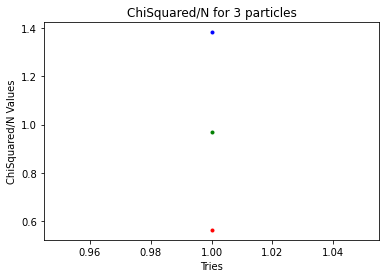

In [17]:
plotChiSquareds(particles,try_array,adjacent_probability=0.10,line_error=1,tries=1)

Fit Function: y = 1.0104166666666665x + 0.0
Fit Function: y = 0.9985294117647059x + 0.0
Fit Function: y = 1.0052083333333335x + 0.0
Fit Function: y = 1.0052083333333335x + 10
123.91053989955377
[0.6372922867063345, 0.187226890756303, 0.2944684709821503]


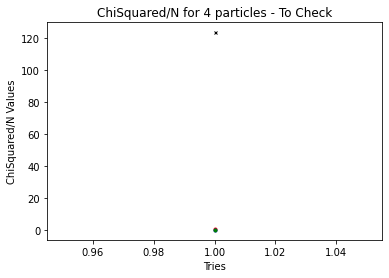

In [19]:
plotChiSquareds(particles,try_array,adjacent_probability=0.10,line_error=1,tries=1,checkChiSquared=True)